In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
import sys
# Add a new path with needed .py files.
sys.path.insert(0, 'C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\MedianFilter\Python') 

import functions
import gitInformation

In [3]:
%matplotlib inline

In [4]:
gitInformation.printInformation()

Information about this notebook
Date: 2015-11-16
Python Version: 2.7.10 |Anaconda 2.3.0 (64-bit)| (default, May 28 2015, 16:44:52) [MSC v.1500 64 bit (AMD64)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: a9cfd3239b6970ca2667fc8890df7517eaedc5ad
Remotes: fork, origin, 
Current branch: master
fork remote URL: http://github.com/dowa4213/kt-2015-DSPHandsOn.git
origin remote URL: https://github.com/ktakagaki/kt-2015-DSPHandsOn.git


In [10]:
# Sine wave, 16 wave numbers, 16*128 samples.  
x = np.linspace(0, 2, 16*128)
data = np.sin(16*np.pi*x)
# Different noises with different standard deviations (spread or "width")
# will be saved in, so we can generate different signal to noise ratios
diff_noise = np.zeros((140,len(data)))
# Noised sine waves. 
noised_sines = np.zeros((140,len(data)))
# Median filtered wave.
medfilter = np.zeros((140,len(data)))
# Filtered sine waves (noised_sines - medfilter)
filtered_sines = np.zeros((140,len(data)))
# Behavior of the median filter. Save the max values of the filtered waves in it.
behav = np.zeros(140)

In [5]:
# Calculate and save all values.
# Counter needed to iterate through the 'values' array.
count = -1
values = np.zeros((11, (550/64)))
for w in range (65, 550, 64):
    count = count + 1
    for x in range(1, 11):
        for i in range (len(diff_noise)):
            # Create different noises, with x we change the signal to noise
            # ratio from 10 to 1.
            diff_noise[i, :] = np.random.normal(0, x/10., len(data))
            # Add noise to each sine wave, to create a realisitc signal.
            noised_sines[i, :] = data + diff_noise[i, :]
            # Filter the all noised sine waves.
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            # Subtract the filtered wave from the noised sine waves.
            filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
            # Save the behavior of the median filter, calculated
            # with the mean of the absolute of the filtered wave.
            behav[i] = np.mean(np.abs(filtered_sines[i, :]))
        # Calculate the mean of the bahvior, so we can see how
        # the signal to noise ratio effects the median filter
        # with different window lengths.
        mean = np.mean(behav)
        # Save the result in the 'values' array
        if x == 0:
            values[-x::,count] = mean
        else:
            values[-(x+1):-x:,count] = mean
# Save the array, because the calculation take some time.
# Load the array with"values = np.loadtxt('values.out')".
np.savetxt("values.txt", values)

In [28]:
values = np.loadtxt("values.txt")

In [5]:
viridis_data = np.loadtxt('viridis_data.txt')
# viris_data taken from
# https://github.com/BIDS/colormap/blob/master/colormaps.py

### Figure 1: Plot of the behavior of the median filter with given window length and different S/N ratio

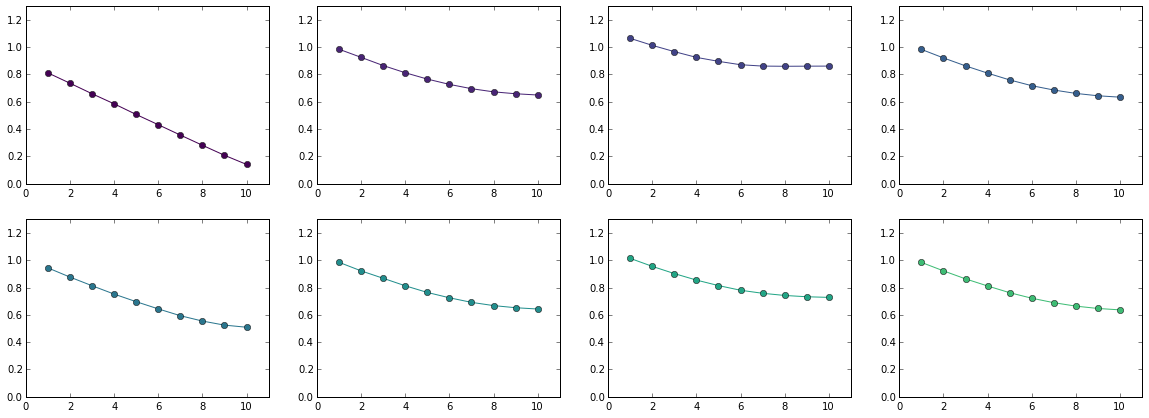

In [65]:
fig = plt.figure(figsize=(20, 7))
for p in range(8):
    ax = plt.subplot(2, 4, 1 + p)
    xticks = np.arange(1, len(values))
    plt.axis([0, 11, 0, 1.3])
    plt.plot(xticks,values[:-1:,p], 'o-', color=viridis_data[p*25,:])
plt.savefig('Behavior with given SN ratio and different wl.png',dpi=300)

### Figure 2: Plot of the behavior of the median filter with given window length and different S/N ratio

In [8]:
values = np.zeros(((450/32), 10))
count = -1
for x in range(1,11):
    for w in range (1,450, 32):
        count = count + 1
        for i in range (len(diff_noise)):
            diff_noise[i, :] = np.random.normal(0, x/10., len(data))
            noised_sines[i, :] = data + diff_noise[i, :]
            medfilter[i, :] = medfilt(noised_sines[i, :], w)
            filtered_sines[i, :] = noised_sines[i, :] - medfilter[i, :]
            behav[i] = np.mean(np.abs(filtered_sines[i, :]))
        mean = np.mean(behav)
        values[count:count+1:,x-1] = mean
    count = -1
np.savetxt("values2.txt", values)

In [63]:
values2 = np.loadtxt("values2.txt")

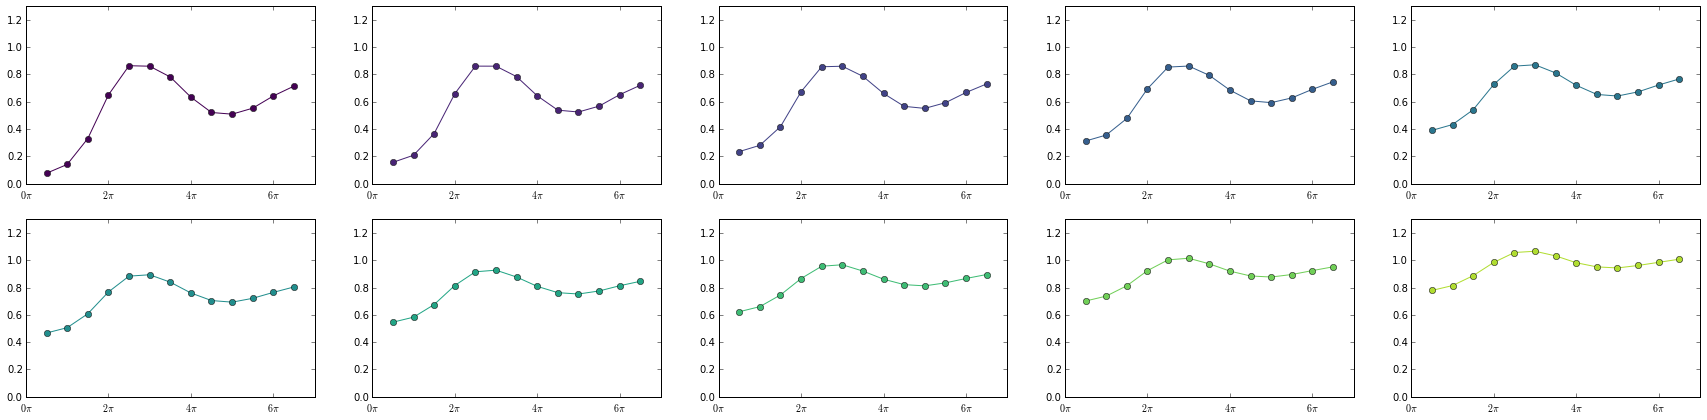

In [45]:
fig = plt.figure(figsize=(30,7))
for p in range(10):
    ax = plt.subplot(2,5,p+1)
    plt.axis([0, 14, 0, 1.3])
    xaxis = np.arange(1, len(values2))
    xticks = np.arange(0, len(values2) + 1, 4)
    ax.set_xticks(xticks)
    x_label = [r"${%s\pi}$" % (2*v) for v in range(0, len(xticks))]
    ax.set_xticklabels(x_label)
    plt.plot(xaxis,values2[1::,p], 'o-', color=viridis_data[p*25,:])
plt.savefig('Behavior with given wl and different SN ratio.png',dpi=300)

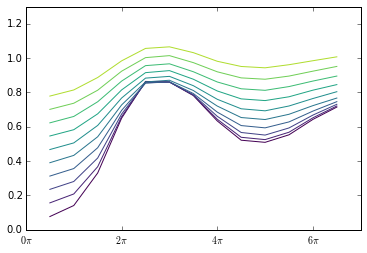

In [78]:
fig = plt.figure()
for i in range (10):
    ax = plt.subplot(1, 1, 1)
    plt.axis([0, 14, 0, 1.3])
    xaxis = np.arange(1, len(values2))
    xticks = np.arange(0, len(values2) + 1, 4)
    ax.set_xticks(xticks)
    x_label = [r"${%s\pi}$" % (2*v) for v in range(0, len(xticks))]
    ax.set_xticklabels(x_label)
    plt.plot(xaxis,values2[1::,i], color=viridis_data[i*25,:])
plt.savefig('Behavior with given wl and different SN ratio2.png',dpi=300)